In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools
import os
import IPython.display as ipd

import scipy.io.wavfile as wav
import wave
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")
import IPython.display as ipd
import scipy.io.wavfile as wav
import pylab
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential, Model, load_model

In [58]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

![https://miro.medium.com/max/720/1*3MadXYXhtHr-XZNPs-1GXg.webp](http://)

In [3]:
input_dir = '/kaggle/input/free-spoken-digits/free-spoken-digit-dataset-master/recordings/'
output_dir = '/kaggle/working/'

## exploring the audio files 

>#### Print names of 10 WAV files from the input path

In [4]:
parent_list = os.listdir(input_dir)
for i in range(10):
    print(parent_list[i])

0_yweweler_39.wav
2_george_15.wav
4_lucas_16.wav
1_yweweler_45.wav
9_george_9.wav
0_nicolas_45.wav
6_nicolas_13.wav
7_george_26.wav
1_theo_25.wav
1_theo_36.wav


### Signal visualization

> #### signals of different frequencies can be added together to create composite signals, representing any sound that occurs in the real-world. This means that any signal consists of many distinct frequencies and can be expressed as the sum of those frequencies.

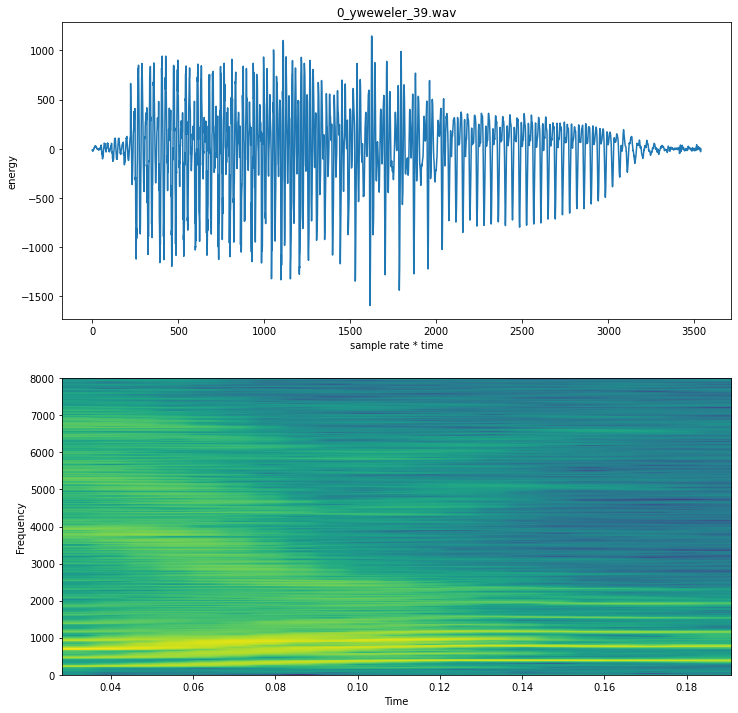

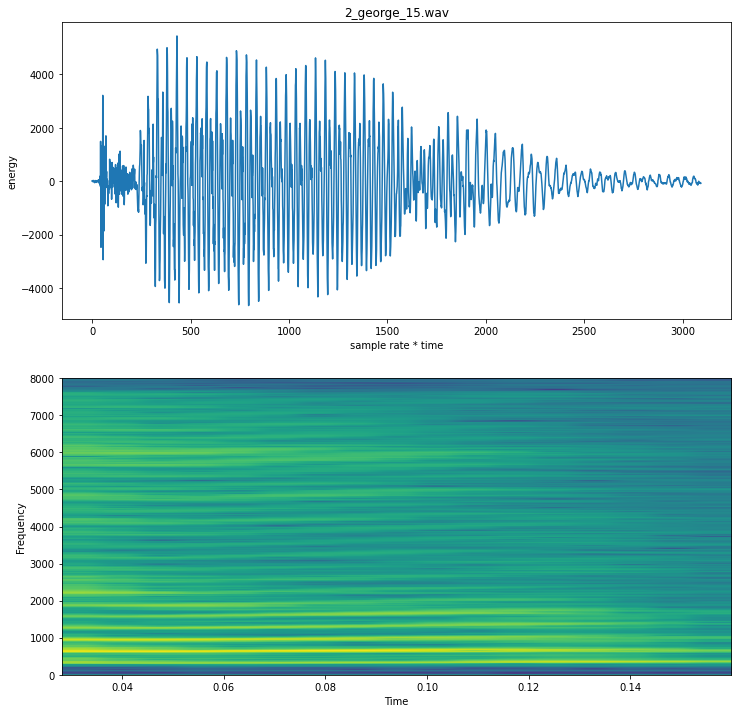

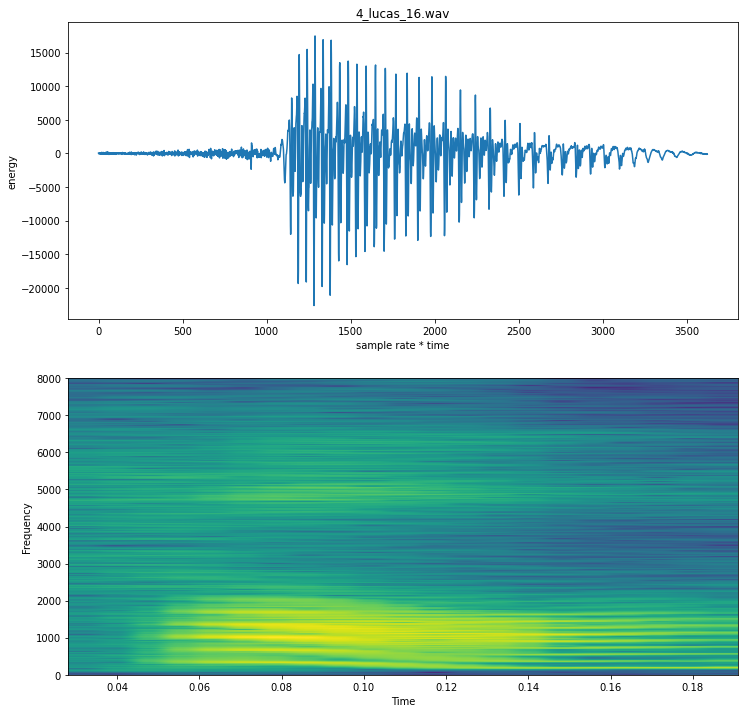

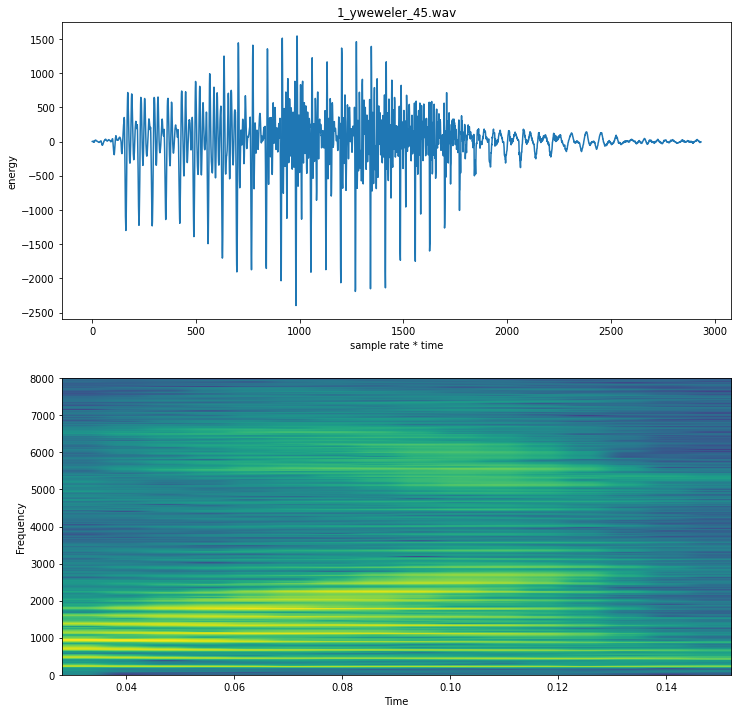

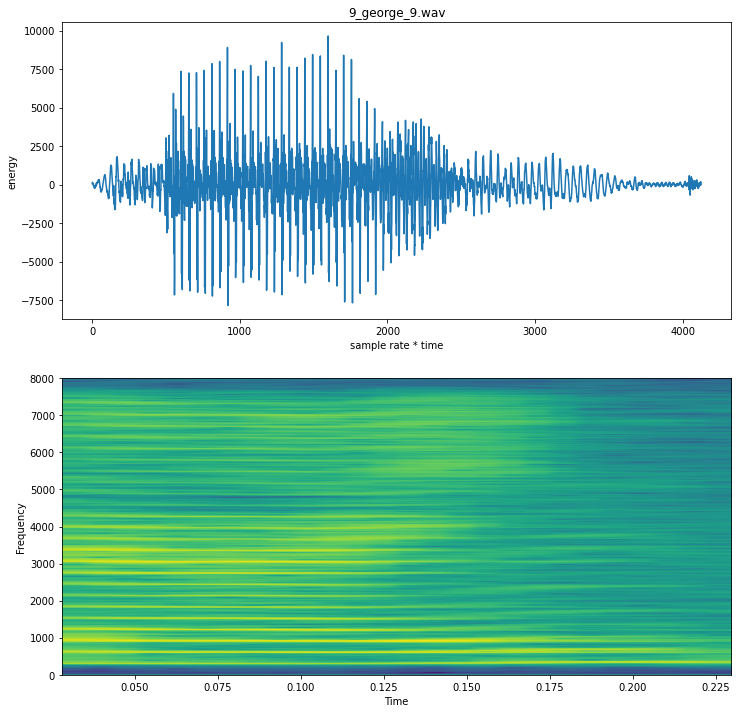

In [4]:
for i in range(5): 
    signal_wave = wave.open(os.path.join(input_dir, parent_list[i]), 'r')
    sample_rate = 16000
    sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.figure(figsize=(12,12))
    plot_a = plt.subplot(211)
    plot_a.set_title(parent_list[i])
    plot_a.plot(sig)
    plot_a.set_xlabel('sample rate * time')
    plot_a.set_ylabel('energy')

    plot_b = plt.subplot(212)
    plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plot_b.set_xlabel('Time')
    plot_b.set_ylabel('Frequency')

plt.show()

>### graph explanation 

> #### the first graph shows us a sense of how loud or quiet a clip is at any point in time, but it gives us very little information about which frequencies are present.

>#### The second picture is the Spectrogram and displays the signal in the Frequency domain.

>#### since the x-axis shows the range of frequency values of the signal at a moment in time

 #### The brighter the color the higher the energy of the signal.
 
 #### Each vertical ‘slice’ of the Spectrogram is essentially the Spectrum of the signal at that instant in time 
 
#### it shows how the signal strength is distributed in every frequency found in the signal at that instant.

#### the frequency in a waveform is the representation of the number of 

#### times that a waveform repeats itself within a one-second time 

#### period. The peak of the waveform at the top is called a crest, 

#### whereas the bottom point is called the trough

### Convert audio files to spectograms
>#### We can now do the actual conversion of every audio sample. The code below uses the wave and pylab library to extract sound information and frame rate from each sample and save the result as spectrogram. 


In [11]:
SIZE = 256
BATCH_SIZE = 32
channels = 3
kernel = 4
stride = 1
pool = 2
for filename in os.listdir(input_dir):
    if "wav" in filename:
        file_path = os.path.join(input_dir, filename)
        target_dir = f'class_{filename[0]}'             
        dist_dir = os.path.join(output_dir, target_dir)
        file_dist_path = os.path.join(dist_dir, filename)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)                
            frame_rate, data = wav.read(file_path)
            signal_wave = wave.open(file_path)
            sig = np.frombuffer(signal_wave.readframes(frame_rate), dtype=np.int16)
            fig = plt.figure()
            plt.specgram(sig, NFFT=1024, Fs=frame_rate, noverlap=900)
            plt.axis('off')
            fig.savefig(f'{file_dist_path}.png', dpi=fig.dpi)
            plt.close()

>#### The incoming noise signal is converted into a waveform that we can utilize for further processing and analysis with the help of the TensorFlow framework.

>#### Once the waveform is obtained successfully, we can proceed to convert this waveform into a spectrogram,

>#### which is a visual representation of the available waveform. 

>#### Since these spectrograms are visual images, we can make use of convolutional neural networks to analyze them

### we converted our signals to spectrogram 
#### A Spectrogram of a signal plots its Spectrum over time and is like a ‘photograph’ of the signal. 

#### It plots Time on the x-axis and Frequency on the y-axis. 

#### It is as though we took the Spectrum again and again at different instances in time, and then joined them all together into a single plot.

In [10]:
target_dir

'class_4'

In [7]:
dist_dir

'/kaggle/working/class_4'

In [8]:
file_dist_path

'/kaggle/working/class_4/4_lucas_0.wav'

In [9]:
file_path 

'/kaggle/input/free-spoken-digits/free-spoken-digit-dataset-master/recordings/4_lucas_0.wav'

In [52]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=output_dir,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(SIZE, SIZE),
                                             subset="training",
                                             seed=0);

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=output_dir,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(SIZE, SIZE),
                                             subset="validation",
                                             seed=0);

Found 3000 files belonging to 11 classes.
Using 2400 files for training.
Found 3000 files belonging to 11 classes.
Using 600 files for validation.


#### Found 3000 files belonging to 11 classes.
#### Using 2400 files for training.
#### Found 3000 files belonging to 11 classes.
#### Using 600 files for validation.

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

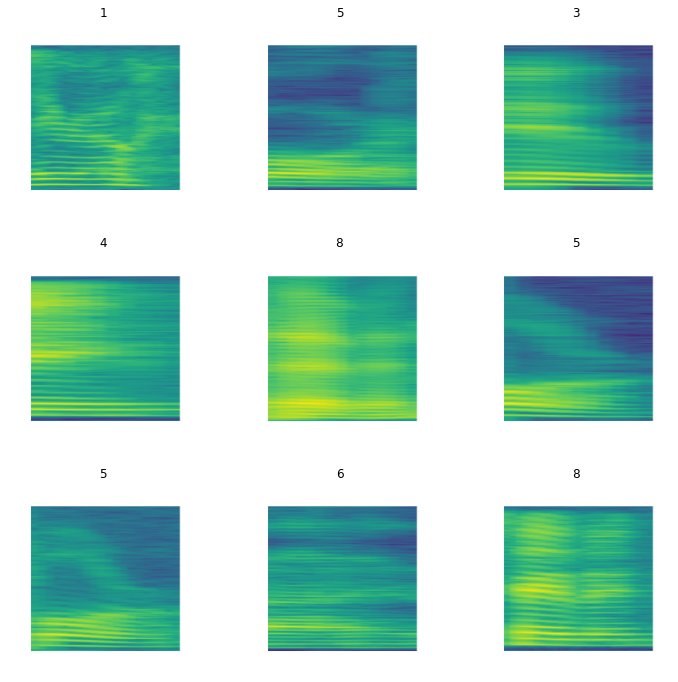

In [90]:
plt.figure(figsize=(12, 12));
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1);
        plt.imshow(images[i].numpy().astype("uint8"));
        plt.title(int(labels[i]));
        plt.axis("off");
plt.show();

### CNN Model

In [24]:
class_names = train_dataset.class_names
num_classes = len(class_names)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = valid_dataset.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(SIZE, SIZE, channels)),
    layers.Conv2D(16, kernel, stride, activation='relu'),
    layers.MaxPool2D(pool),
    layers.Conv2D(32, kernel, stride, activation='relu'),
    layers.MaxPool2D(pool),
    layers.Conv2D(64, kernel, stride, activation='relu'),
    layers.MaxPool2D(pool),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 253, 253, 16)      784       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 123, 123, 32)      8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 64)       

In [25]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='checkpoint.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model.compile(optimizer='adam', 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])

In [60]:
epochs = 15
history = model.fit(
    train_ds, epochs=epochs, callbacks=model_checkpoint_callback, validation_data=val_ds,
);

Epoch 1/15
75/75 [==============================] - 2s 29ms/step - loss: 0.0125 - accuracy: 0.9971 - val_loss: 0.1251 - val_accuracy: 0.9667
Epoch 2/15
75/75 [==============================] - 2s 28ms/step - loss: 0.0064 - accuracy: 0.9975 - val_loss: 0.1336 - val_accuracy: 0.9717
Epoch 3/15
75/75 [==============================] - 2s 29ms/step - loss: 0.0096 - accuracy: 0.9979 - val_loss: 0.0997 - val_accuracy: 0.9750
Epoch 4/15
75/75 [==============================] - 2s 28ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0993 - val_accuracy: 0.9800
Epoch 5/15
75/75 [==============================] - 2s 28ms/step - loss: 2.1961e-04 - accuracy: 1.0000 - val_loss: 0.1005 - val_accuracy: 0.9800
Epoch 6/15
75/75 [==============================] - 2s 28ms/step - loss: 1.3174e-04 - accuracy: 1.0000 - val_loss: 0.1030 - val_accuracy: 0.9800
Epoch 7/15
75/75 [==============================] - 2s 29ms/step - loss: 1.0435e-04 - accuracy: 1.0000 - val_loss: 0.1036 - val_accuracy: 0.9800
E

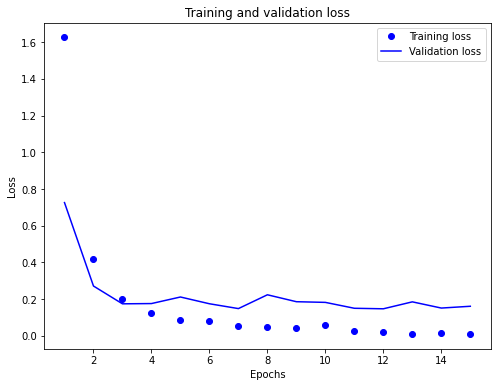

In [11]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

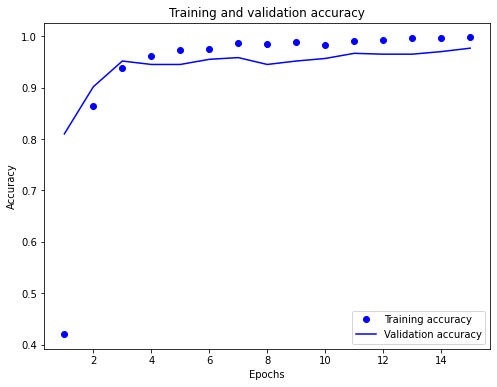

In [12]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### LSTM Model


In [14]:
import librosa,librosa.display
from tqdm.notebook import tqdm

In [14]:
path='../input/free-spoken-digits/free-spoken-digit-dataset-master/recordings/0_george_0.wav'
dir_path='../input/free-spoken-digits/free-spoken-digit-dataset-master/recordings/'

>#### We will be reading sound file with the help of librosa library which will convert sound file into time series y, represented as a one-dimensional NumPy floating point array

In [15]:
raw_data,framerate=librosa.load(path)
raw_data,framerate

(array([-0.04289964, -0.04552099, -0.03932492, ..., -0.00223843,
         0.00246574,  0.        ], dtype=float32),
 22050)

In [15]:
data=pd.DataFrame(columns=['raw_data','duration','digit'])
dir_path='../input/free-spoken-digits/free-spoken-digit-dataset-master/recordings/'
for i in tqdm(os.listdir(dir_path)):
        raw_data,frame_rate=librosa.load(dir_path+i)
        duration=librosa.get_duration(raw_data,frame_rate)
        data.loc[len(data.index)]=[raw_data,duration,i.split('_')[0]]

  0%|          | 0/3000 [00:00<?, ?it/s]

In [16]:
raw_data

array([-0.00043054, -0.00045455, -0.00045327, ..., -0.00044128,
       -0.00020973,  0.        ], dtype=float32)

In [17]:
frame_rate

22050

In [18]:
duration

0.42290249433106575

In [23]:
data.head()

,raw_data,duration,digit
0,"[-0.0003522828, -0.0004043743, -0.00042937655,...",0.442540,0
1,"[0.00015500825, 0.00017455152, 0.0002386441, 0...",0.386757,2
2,"[0.001795757, 0.0026935437, 0.002892576, 0.002...",0.452789,4
3,"[4.6767876e-05, 5.3672145e-05, 5.9389324e-05, ...",0.366893,1
4,"[0.0019297323, 0.0029626002, 0.0038687917, 0.0...",0.515646,9


In [62]:
X_train, X_test, y_train, y_test = train_test_split(data[['raw_data','duration']],data['digit'], test_size=0.3, random_state=45)

In [63]:
max_length=20366
X_train=tf.keras.preprocessing.sequence.pad_sequences(X_train['raw_data'],maxlen=max_length, dtype='float32')
X_test=tf.keras.preprocessing.sequence.pad_sequences(X_test['raw_data'],maxlen=max_length, dtype='float32')

In [64]:
X_train.shape

(2100, 20366)

### convert the signals to spectogram

>#### the vertical space between 1,000 and 2,000Hz is half of the vertical space between 2,000Hz and 4,000Hz. In the mel spectrogram, the space between those ranges is approximately the same. 

> #### This scaling is analogous to human hearing, where we find it easier to distinguish between similar low frequency sounds than similar high frequency sounds.

>#### A mel spectrogram computes its output by multiplying frequency-domain values by a filter bank.

In [29]:
def convert_to_spectrogram(raw_data):
    spect = librosa.feature.melspectrogram(y=raw_data, n_mels=64) 
    mel_spect = librosa.power_to_db(S=spect, ref=np.max)
    return mel_spect


>#### Mel-spectrogram, like all of the other feature extraction functions in librosa, produces a set of values for each frame of audio. 

>#### By convention, the frame index is the last dimension of the result, and the number of channels/values per frame is the first dimension.  

>#### So if you have a mel spectrogram output with shape (128, 177), that means you have 177 frames of audio, each of which has 128 mel channel values.

In [66]:
X_train_spectrogram=np.array([convert_to_spectrogram(np.array([float(i) for i in X_train[k] ])) for k in range(len(X_train)) ])
X_test_spectrogram=np.array([convert_to_spectrogram(np.array([float(i) for i in X_test[k] ])) for k in range(len(X_test)) ])
X_train_spectrogram.shape

(2100, 64, 40)

In [76]:
input_layer=Input(shape=(64,40), dtype=np.float32,name='input_layer')
lstm=LSTM(500,name='lstm_layer',return_sequences=True)(input_layer)
d1=Dense(120,activation='relu',name='dense1')(tf.math.reduce_mean(lstm, 2))
d2=Dense(60,activation='relu',name='dense2')(d1)
d3=Dense(60,activation='softmax',name='dense3')(d2)
model = Model(inputs=input_layer, outputs=d3)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64, 40)]          0         
_________________________________________________________________
lstm_layer (LSTM)            (None, 64, 500)           1082000   
_________________________________________________________________
tf.math.reduce_mean_1 (TFOpL (None, 64)                0         
_________________________________________________________________
dense1 (Dense)               (None, 120)               7800      
_________________________________________________________________
dense2 (Dense)               (None, 60)                7260      
_________________________________________________________________
dense3 (Dense)               (None, 60)                3660      
Total params: 1,100,720
Trainable params: 1,100,720
Non-trainable params: 0
_________________________________________________

In [77]:
opt= tf.keras.optimizers.Adam(learning_rate=0.001)

In [78]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])

In [88]:
lstm_h=model.fit(X_train_spectrogram,y_train.astype('int')\
           ,validation_data=(X_test_spectrogram,y_test.astype('int'))\
           ,batch_size=32,epochs=15)

Epoch 1/15
66/66 [==============================] - 1s 16ms/step - loss: 0.1807 - accuracy: 0.9438 - val_loss: 0.3030 - val_accuracy: 0.9000
Epoch 2/15
66/66 [==============================] - 1s 14ms/step - loss: 0.2017 - accuracy: 0.9276 - val_loss: 0.3234 - val_accuracy: 0.8956
Epoch 3/15
66/66 [==============================] - 1s 14ms/step - loss: 0.1927 - accuracy: 0.9371 - val_loss: 0.2758 - val_accuracy: 0.9122
Epoch 4/15
66/66 [==============================] - 1s 14ms/step - loss: 0.1888 - accuracy: 0.9338 - val_loss: 0.2851 - val_accuracy: 0.9078
Epoch 5/15
66/66 [==============================] - 1s 14ms/step - loss: 0.1807 - accuracy: 0.9362 - val_loss: 0.2943 - val_accuracy: 0.9078
Epoch 6/15
66/66 [==============================] - 1s 14ms/step - loss: 0.1795 - accuracy: 0.9367 - val_loss: 0.3226 - val_accuracy: 0.9033
Epoch 7/15
66/66 [==============================] - 1s 14ms/step - loss: 0.1704 - accuracy: 0.9419 - val_loss: 0.2909 - val_accuracy: 0.9078
Epoch 8/15
66

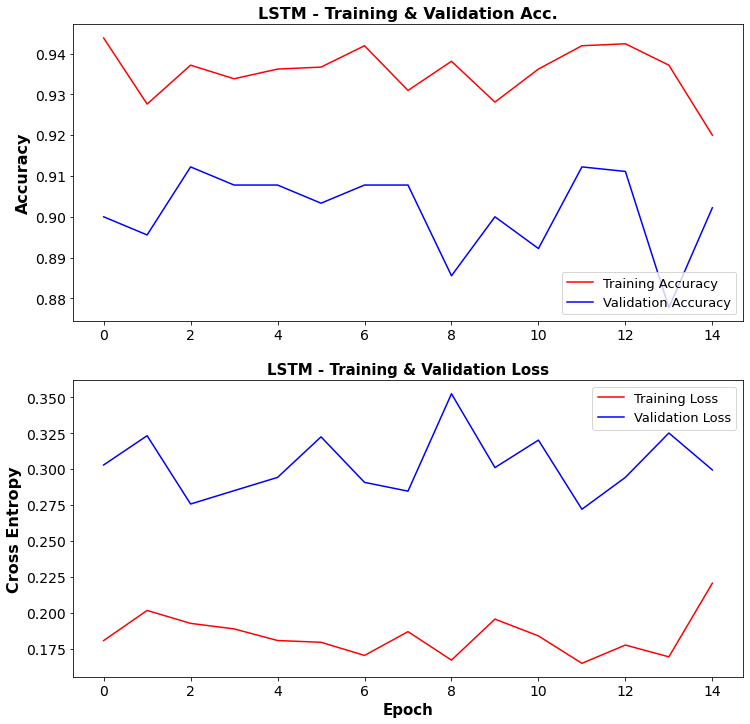

In [89]:
acc = lstm_h.history['accuracy']
val_acc = lstm_h.history['val_accuracy']

loss = lstm_h.history['loss']
val_loss = lstm_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()